<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap16/16_1_1D_Normalizing_Flows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 16.1: 1D normalizing flows**

This notebook investigates a 1D normalizing flows example similar to that illustrated in figures 16.1 to 16.3 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First we start with a base probability density function

In [2]:
# Define the base pdf
def gauss_pdf(z, mu, sigma):
  pr_z = np.exp( -0.5 * (z-mu) * (z-mu) / (sigma * sigma))/(np.sqrt(2*3.1413) * sigma)
  return pr_z

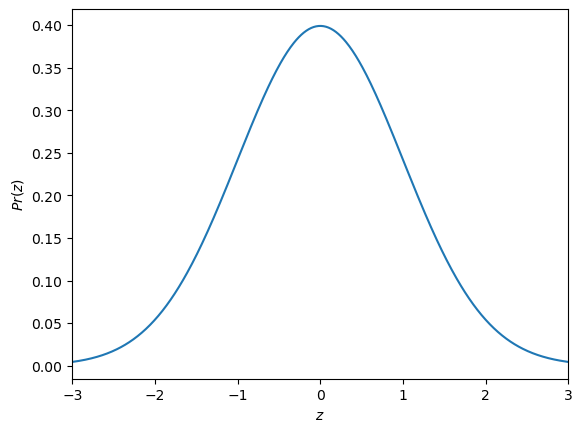

In [3]:
z = np.arange(-3,3,0.01)
pr_z = gauss_pdf(z, 0, 1)

fig,ax = plt.subplots()
ax.plot(z, pr_z)
ax.set_xlim([-3,3])
ax.set_xlabel('$z$')
ax.set_ylabel('$Pr(z)$')
plt.show();

Now let's define a nonlinear function that maps from the latent space $z$ to the observed data $x$.

In [4]:
# Define a function that maps from the base pdf over z to the observed space x
def f(z):
    x1 = 6/(1+np.exp(-(z-0.25)*1.5))-3
    x2 = z
    p = z * z/9
    x = (1-p) * x1 + p * x2
    return x

# Compute gradient of that function using finite differences
def df_dz(z):
    return (f(z+0.0001)-f(z-0.0001))/0.0002

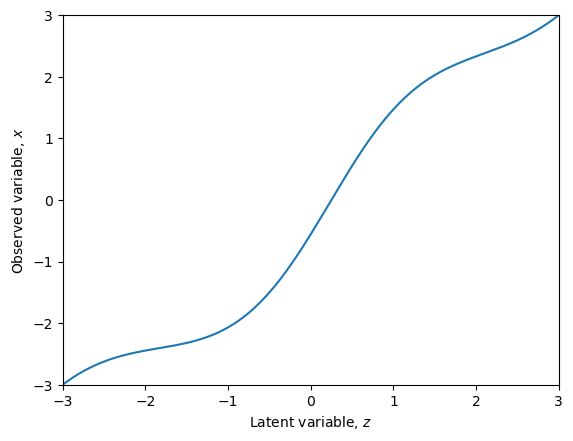

In [5]:
x = f(z)
fig, ax = plt.subplots()
ax.plot(z,x)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel('Latent variable, $z$')
ax.set_ylabel('Observed variable, $x$')
plt.show()

Now let's evaluate the density in the observed space using equation 16.1

In [9]:
# TODO -- plot the density in the observed space
# Replace these line
x = f(z)
dfdz = df_dz(z) 
pr_x = gauss_pdf(z, 0, 1) / np.abs(dfdz)  # Use equation 16.1


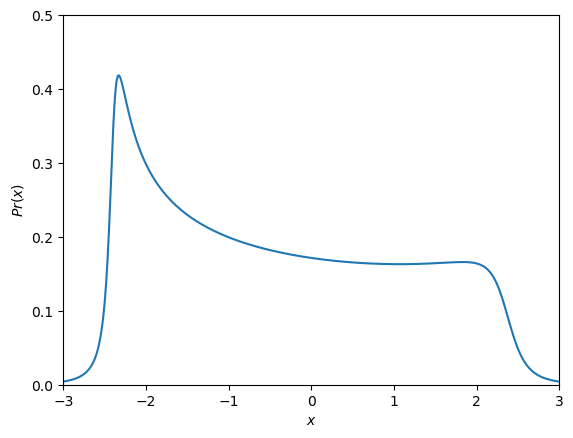

In [10]:
# Plot the density in the observed space
fig,ax = plt.subplots()
ax.plot(x, pr_x)
ax.set_xlim([-3,3])
ax.set_ylim([0, 0.5])
ax.set_xlabel('$x$')
ax.set_ylabel('$Pr(x)$')
plt.show();

Now let's draw some samples from the new distribution (see section 16.1)

In [13]:
np.random.seed(1)
n_sample = 20

# TODO -- Draw samples from the modeled density
# Replace this line

# Draw samples from the base density (standard normal distribution)
z_samples = np.random.randn(n_sample, 1)

# Apply the forward mapping to get samples in the observed space
x_samples = f(z_samples)



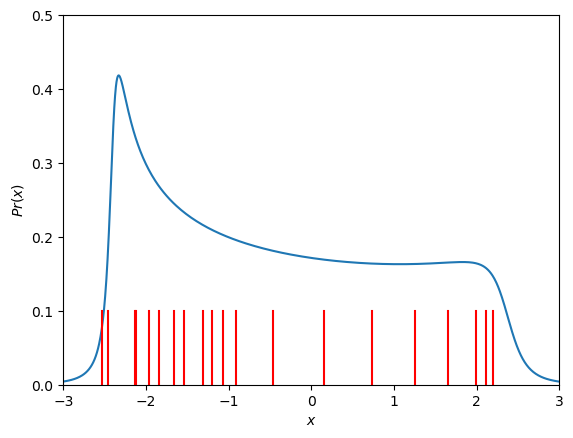

In [14]:
# Draw the samples
fig,ax = plt.subplots()
ax.plot(x, pr_x)
for x_sample in x_samples:
  ax.plot([x_sample, x_sample], [0,0.1], 'r-')

ax.set_xlim([-3,3])
ax.set_ylim([0, 0.5])
ax.set_xlabel('$x$')
ax.set_ylabel('$Pr(x)$')
plt.show();